<a href="https://colab.research.google.com/github/joaop06/PI-5_Semestre/blob/main/ExtracaoPadrao_PI5_Crypto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Carregando os dados

In [97]:
# Célula 1 - Importações e Configuração Inicial
from google.colab import drive
drive.mount('/content/drive')

# Importando bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [98]:
# Célula 2 - Carregamento e Visualização Inicial dos Dados
# Carregando o dataset
df = pd.read_csv('/content/drive/My Drive/Datasets/crypto_risk_profile_detailed.csv')

# Exibindo as primeiras linhas
print("Primeiras linhas do DataFrame:")
display(df.head())

# Informações sobre o DataFrame
print("\nInformações do DataFrame:")
print(df.info())

# Dimensões do DataFrame
print("\nDimensões do DataFrame:")
print(df.shape)

# Estatísticas descritivas
print("\nEstatísticas descritivas:")
display(df.describe())

# Distribuição das classes de risco
print("\nDistribuição das classes de risco:")
print(df.groupby('Risk_Level').size())

Primeiras linhas do DataFrame:


,Crypto,Risk_Level,Volatility,Max_Drawdown,Beta,Liquidity
0,1inch,Médio,1.239707,0.916489,0.522958,0.954086
1,Aave,Alto,61.586316,0.921824,23.194175,0.962827
2,Algorand,Médio,1.109923,0.938649,0.336431,0.952151
3,ApeCoin,Alto,67.191056,0.999990,24.141030,0.781126
4,Arweave,Médio,1.436972,0.924526,0.320225,0.947030



Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Crypto        98 non-null     object 
 1   Risk_Level    98 non-null     object 
 2   Volatility    98 non-null     float64
 3   Max_Drawdown  98 non-null     float64
 4   Beta          98 non-null     float64
 5   Liquidity     98 non-null     float64
dtypes: float64(4), object(2)
memory usage: 4.7+ KB
None

Dimensões do DataFrame:
(98, 6)

Estatísticas descritivas:


,Volatility,Max_Drawdown,Beta,Liquidity
count,98.000000,98.000000,98.000000,98.000000
mean,3.293072,0.837769,1.128215,0.915347
std,10.507031,0.264672,3.834279,0.109943
min,0.059029,0.024390,-0.005285,0.000000
25%,1.037456,0.876287,0.284077,0.918545
50%,1.213807,0.932355,0.396121,0.938171
75%,1.424527,0.980828,0.471278,0.952329
max,67.191056,1.000000,24.141030,0.973416



Distribuição das classes de risco:
Risk_Level
Alto          22
Baixo         10
Médio         59
Stablecoin     7
dtype: int64


In [109]:
# Célula 3 - Preparação dos Dados
# Examinando o DataFrame
print("Colunas no DataFrame:")
print(df.columns.tolist())

print("\nPrimeiras linhas do DataFrame:")
display(df.head())

print("\nTipos de dados de cada coluna:")
print(df.dtypes)

# Verificar valores únicos em Risk_Level antes do mapeamento
print("\nValores únicos em Risk_Level antes do mapeamento:")
print(df['Risk_Level'].unique())

# Mapeamento dos níveis de risco
risk_map = {'Stablecoin': 0, 'Baixo': 1, 'Médio': 2, 'Alto': 3}
risk_map_reverse = {0: 'Stablecoin', 1: 'Baixo', 2: 'Médio', 3: 'Alto'}
df['Risk_Level_Numeric'] = df['Risk_Level'].map(risk_map)

# Verificar o mapeamento
print("\nVerificação do mapeamento:")
print(df[['Risk_Level', 'Risk_Level_Numeric']].head(10))

# Selecionando features
features = ['Volatility', 'Max_Drawdown', 'Beta', 'Liquidity']

# Verificar valores nulos
print("\nValores nulos nas features:")
print(df[features + ['Risk_Level_Numeric']].isnull().sum())

# Remover linhas com valores nulos
df_clean = df.dropna(subset=features + ['Risk_Level_Numeric'])

# Selecionando features e target
X = df_clean[features].values
y = df_clean['Risk_Level_Numeric'].values

# Verificar se há NaN nos dados
print("\nVerificando NaN em X:")
print("NaN em X:", np.isnan(X).any())
print("\nVerificando NaN em y:")
print("NaN em y:", np.isnan(y).any())

# Divisão treino-teste
validation_size = 0.20
seed = 7
X_train, X_validation, y_train, y_validation = model_selection.train_test_split(
    X, y, test_size=validation_size, random_state=seed)

print("\nDimensões dos conjuntos de dados:")
print(f"X_train: {X_train.shape}")
print(f"X_validation: {X_validation.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_validation: {y_validation.shape}")

# Verificar se os dados estão corretos
print("\nAmostra dos dados de treino (primeiras 5 linhas):")
print("X_train:")
print(X_train[:5])
print("\ny_train:")
print(y_train[:5])

# Verificar distribuição das classes
print("\nDistribuição das classes em y_train:")
unique, counts = np.unique(y_train, return_counts=True)
for u, c in zip(unique, counts):
    print(f"Classe {risk_map_reverse[u]}: {c} amostras")

Colunas no DataFrame:
['Crypto', 'Risk_Level', 'Volatility', 'Max_Drawdown', 'Beta', 'Liquidity', 'Risk_Level_Numeric']

Primeiras linhas do DataFrame:


,Crypto,Risk_Level,Volatility,Max_Drawdown,Beta,Liquidity,Risk_Level_Numeric
0,1inch,Médio,1.239707,0.916489,0.522958,0.954086,2
1,Aave,Alto,61.586316,0.921824,23.194175,0.962827,3
2,Algorand,Médio,1.109923,0.938649,0.336431,0.952151,2
3,ApeCoin,Alto,67.191056,0.999990,24.141030,0.781126,3
4,Arweave,Médio,1.436972,0.924526,0.320225,0.947030,2



Tipos de dados de cada coluna:
Crypto                 object
Risk_Level             object
Volatility            float64
Max_Drawdown          float64
Beta                  float64
Liquidity             float64
Risk_Level_Numeric      int64
dtype: object

Valores únicos em Risk_Level antes do mapeamento:
['Médio' 'Alto' 'Baixo' 'Stablecoin']

Verificação do mapeamento:
   Risk_Level  Risk_Level_Numeric
0       Médio                   2
1        Alto                   3
2       Médio                   2
3        Alto                   3
4       Médio                   2
5        Alto                   3
6       Baixo                   1
7       Médio                   2
8  Stablecoin                   0
9       Médio                   2

Valores nulos nas features:
Volatility            0
Max_Drawdown          0
Beta                  0
Liquidity             0
Risk_Level_Numeric    0
dtype: int64

Verificando NaN em X:
NaN em X: False

Verificando NaN em y:
NaN em y: False

Dimensões do

##Visualização dos dados

In [ ]:
# Box plots para cada feature
plt.figure(figsize=(12, 6))
df[features].boxplot()
plt.title('Distribuição das Features')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Histogramas
plt.figure(figsize=(12, 8))
df[features].hist(layout=(2,2), figsize=(12, 8))
plt.tight_layout()
plt.show()

In [ ]:
# Matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [ ]:
# gráfico de dispersão
pd.plotting.scatter_matrix(df[features], figsize=(12, 12))
plt.show()

##Criar conjunto de validação

In [104]:
# Conjunto de Validação
array = df.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

print(X_train.shape)
print(Y_train.shape)

print(X_validation.shape)
print(Y_validation.shape)


(78, 4)
(78,)
(20, 4)
(20,)


In [105]:
# Métricas
seed = 7
scoring = 'accuracy'

### Regressão Logística (LR)
### Análise Linear Discriminante (LDA)
### K-vizinhos mais próximos (KNN)
### Árvores de Classificação (Decision Tree) e Regressão (CART)
### Gaussian Naive Bayes (NB)
### Support Vector Machines (SVM)

In [110]:
# Célula 5 - Definição e Avaliação dos Modelos
# Configuração dos modelos
models = [
    ('LR', LogisticRegression(solver='liblinear')),
    ('LDA', LinearDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('NB', GaussianNB()),
    ('SVM', SVC(gamma='auto'))
]

# Avaliação de cada modelo
results = []
names = []
scoring = 'accuracy'

print("Resultados da Validação Cruzada:")
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=7)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean():.3f} (+/- {cv_results.std() * 2:.3f})")


Resultados da Validação Cruzada:
LR: 0.704 (+/- 0.335)
LDA: 0.691 (+/- 0.344)
KNN: 0.846 (+/- 0.275)
CART: 0.923 (+/- 0.202)
NB: 0.857 (+/- 0.259)
SVM: 0.729 (+/- 0.294)


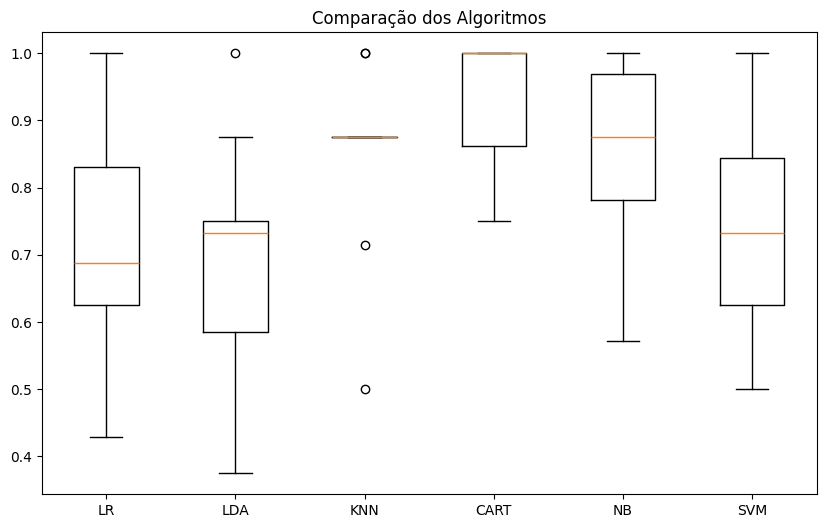

In [111]:
# Visualização da comparação dos modelos
plt.figure(figsize=(10, 6))
plt.boxplot(results)
plt.xticks(range(1, len(names) + 1), names)
plt.title('Comparação dos Algoritmos')
plt.show()


In [112]:
# Célula 6 - Treinamento e Avaliação do Melhor Modelo
# Treinando o modelo CART (melhor performance na validação cruzada)
best_model = DecisionTreeClassifier()
best_model.fit(X_train, y_train)

# Fazendo previsões
predictions = best_model.predict(X_validation)

# Avaliando resultados
print("Resultados do Melhor Modelo (CART):")
print("\nAcurácia:", accuracy_score(y_validation, predictions))

print("\nMatriz de Confusão:")
print(confusion_matrix(y_validation, predictions))

print("\nRelatório de Classificação:")
print(classification_report(y_validation, predictions,
                          target_names=['Stablecoin', 'Baixo', 'Médio', 'Alto']))

Resultados do Melhor Modelo (CART):

Acurácia: 1.0

Matriz de Confusão:
[[ 2  0  0  0]
 [ 0  2  0  0]
 [ 0  0 12  0]
 [ 0  0  0  4]]

Relatório de Classificação:
              precision    recall  f1-score   support

  Stablecoin       1.00      1.00      1.00         2
       Baixo       1.00      1.00      1.00         2
       Médio       1.00      1.00      1.00        12
        Alto       1.00      1.00      1.00         4

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



##Fazer a validação dos demais algoritmos.

In [113]:
# Célula 7 - Função para Previsão com Novos Dados
def predict_new_data(model, new_data_path):
    # Carregando novos dados
    nova_tabela = pd.read_csv(new_data_path)

    # Selecionando features na mesma ordem do treinamento
    features = ['Volatility', 'Max_Drawdown', 'Beta', 'Liquidity']
    novos_dados = nova_tabela[features].values

    # Fazendo previsões
    previsoes = model.predict(novos_dados)

    # Mapeamento reverso para obter as classes em texto
    risk_map_reverse = {0: 'Stablecoin', 1: 'Baixo', 2: 'Médio', 3: 'Alto'}
    previsoes_texto = [risk_map_reverse[p] for p in previsoes]

    return previsoes_texto



In [114]:
# Célula para fazer previsões com novos dados
def create_validation_data():
    # Criando alguns dados de exemplo para validação
    validation_data = pd.DataFrame({
        'Volatility': [1.5, 45.0, 0.5, 25.0],
        'Max_Drawdown': [0.92, 0.95, 0.85, 0.98],
        'Beta': [0.4, 15.0, 0.2, 8.0],
        'Liquidity': [0.95, 0.85, 0.98, 0.75]
    })

    return validation_data

# Função para fazer previsões
def predict_risk_level(model, data):
    # Fazer previsões
    predictions = model.predict(data[features].values)

    # Converter previsões numéricas para labels
    risk_map_reverse = {0: 'Stablecoin', 1: 'Baixo', 2: 'Médio', 3: 'Alto'}
    predictions_labels = [risk_map_reverse[pred] for pred in predictions]

    # Adicionar previsões ao DataFrame
    data['Predicted_Risk'] = predictions_labels

    return data

# Criar dados de validação
validation_data = create_validation_data()

# Fazer previsões
results = predict_risk_level(best_model, validation_data)

# Mostrar resultados
print("Resultados das previsões:")
display(results)

# Adicionalmente, podemos mostrar as probabilidades para cada classe (se o modelo suportar)
if hasattr(best_model, 'predict_proba'):
    probabilities = best_model.predict_proba(validation_data[features].values)
    prob_df = pd.DataFrame(
        probabilities,
        columns=['Prob_Stablecoin', 'Prob_Baixo', 'Prob_Médio', 'Prob_Alto']
    )
    results_with_prob = pd.concat([results, prob_df], axis=1)
    print("\nResultados com probabilidades:")
    display(results_with_prob)

Resultados das previsões:


,Volatility,Max_Drawdown,Beta,Liquidity,Predicted_Risk
0,1.5,0.92,0.4,0.95,Médio
1,45.0,0.95,15.0,0.85,Alto
2,0.5,0.85,0.2,0.98,Médio
3,25.0,0.98,8.0,0.75,Alto



Resultados com probabilidades:


,Volatility,Max_Drawdown,Beta,Liquidity,Predicted_Risk,Prob_Stablecoin,Prob_Baixo,Prob_Médio,Prob_Alto
0,1.5,0.92,0.4,0.95,Médio,0.0,0.0,1.0,0.0
1,45.0,0.95,15.0,0.85,Alto,0.0,0.0,0.0,1.0
2,0.5,0.85,0.2,0.98,Médio,0.0,0.0,1.0,0.0
3,25.0,0.98,8.0,0.75,Alto,0.0,0.0,0.0,1.0


In [115]:
# Exemplo de como criar dados personalizados para teste
custom_data = pd.DataFrame({
    'Volatility': [2.5],  # Seu valor de volatilidade
    'Max_Drawdown': [0.90],  # Seu valor de drawdown
    'Beta': [1.2],  # Seu valor de beta
    'Liquidity': [0.88]  # Seu valor de liquidez
})

# Fazer previsão
custom_results = predict_risk_level(best_model, custom_data)
print("\nResultado para dados personalizados:")
display(custom_results)


Resultado para dados personalizados:


,Volatility,Max_Drawdown,Beta,Liquidity,Predicted_Risk
0,2.5,0.9,1.2,0.88,Alto
